# 1. 쇼핑몰 고객 주문 데이터 파악하기

* 현재 데이터로부터 상황 파악
* 모델 수립 또는 목표 설정

### **1-1. 데이터셋**
* 온라인 리테일 사이트의 2010년12월부터 2011년 12월까지의 주문 기록 데이터
* 데이터는 약 500,000건 데이터

In [3]:
import pandas as pd
import numpy as np

In [4]:
# pandas를 통해 OnlineRetail.csv 읽어오기
retail = pd.read_csv('./OnlineRetail.csv')

In [5]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

* InvoiceNo : 주문번호
* StockCode : 아이템 아이디
* Description : 상품 설명
* Quantity : 상품 주문 수량
* InvoiceData : 주문 시각
* UnitPrice : 상품 가격(동일한 통화)
* Customer ID : 고객 아이디
* Country : 고객 거주 지역(국가)

In [6]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37309 entries, 0 to 37308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    37309 non-null  object 
 1   StockCode    37309 non-null  object 
 2   Description  37192 non-null  object 
 3   Quantity     37309 non-null  int64  
 4   InvoiceDate  37309 non-null  object 
 5   UnitPrice    37308 non-null  float64
 6   CustomerID   24429 non-null  float64
 7   Country      37308 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [8]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,37309.000000,37308.000000,24429.000000
mean,8.011901,6.230193,15540.025339
std,61.414804,148.693371,1731.742013
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.280000,14210.000000
50%,2.000000,2.510000,15570.000000
75%,7.000000,4.250000,17158.000000
max,2880.000000,13541.330000,18269.000000


In [9]:
# 각 필드당 Null이 몇 개 있는지 확인
retail.isnull().sum()

InvoiceNo          0
StockCode          0
Description      117
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     12880
Country            1
dtype: int64

In [10]:
# Customer ID의 Null을 제거
retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

24429

In [11]:
# 수량, 가격이 0이상인 데이터만 저장
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

23867

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23867 entries, 0 to 37307
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    23867 non-null  object 
 1   StockCode    23867 non-null  object 
 2   Description  23867 non-null  object 
 3   Quantity     23867 non-null  int64  
 4   InvoiceDate  23867 non-null  object 
 5   UnitPrice    23867 non-null  float64
 6   CustomerID   23867 non-null  float64
 7   Country      23867 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.6+ MB


In [13]:
# 데이터 타입 변경으로 메모리 용량 줄이기
# memory usage : 27.3+ MB -> 25.8+ MB
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23867 entries, 0 to 37307
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    23867 non-null  object 
 1   StockCode    23867 non-null  object 
 2   Description  23867 non-null  object 
 3   Quantity     23867 non-null  int64  
 4   InvoiceDate  23867 non-null  object 
 5   UnitPrice    23867 non-null  float64
 6   CustomerID   23867 non-null  int32  
 7   Country      23867 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 1.5+ MB


### **새로운 컬럼 추가**
* 수량 * 새로운 고객의 총 지출 비용(CheckoutPrice)

In [14]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### **정제 데이터 저장**

In [15]:
# OnlineRetailClean.csv 저장
retail.to_csv('./OnlineRetailClean.csv')

### **1-2. 매출, 가장 많이 팔링 아이템 확인하기**

In [16]:
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [17]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
}
retail = pd.read_csv('./OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [18]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23867 entries, 0 to 23866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23867 non-null  int64  
 1   InvoiceNo      23867 non-null  int64  
 2   StockCode      23867 non-null  object 
 3   Description    23867 non-null  object 
 4   Quantity       23867 non-null  int32  
 5   InvoiceDate    23867 non-null  object 
 6   UnitPrice      23867 non-null  float32
 7   CustomerID     23867 non-null  int32  
 8   Country        23867 non-null  object 
 9   CheckoutPrice  23867 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 1.5+ MB


In [19]:
# 날짜 타입이 존재하는 이유는 날짜 계산하기 편하기 때문이다!!

### **날짜 타입 데이터 변환**

* 문자열로 데이터를 로딩하는 것보다 data/datatime 타입으로 로딩하는 것이 분석 및 계산에 용이하다.

In [20]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [21]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23867 entries, 0 to 23866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     23867 non-null  int64         
 1   InvoiceNo      23867 non-null  int64         
 2   StockCode      23867 non-null  object        
 3   Description    23867 non-null  object        
 4   Quantity       23867 non-null  int32         
 5   InvoiceDate    23867 non-null  datetime64[ns]
 6   UnitPrice      23867 non-null  float32       
 7   CustomerID     23867 non-null  int32         
 8   Country        23867 non-null  object        
 9   CheckoutPrice  23867 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 1.5+ MB


In [22]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

518805.70000000007

In [24]:
# 국가별 매출 (-> 오름차순)
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Netherlands           192.60
Poland                248.16
Austria               277.20
Switzerland           303.40
Channel Islands       363.53
Italy                 427.80
Iceland               711.79
Finland               892.80
Belgium               971.26
Australia            1032.85
Denmark              1281.50
Cyprus               1590.82
Lithuania            1661.06
Spain                1843.73
Portugal             2439.97
Norway               3787.12
Sweden               3834.30
EIRE                 7350.63
Japan                7705.07
France               7913.44
Germany             12747.76
United Kingdom     461228.91
Name: CheckoutPrice, dtype: float64

[Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'United Kingdom')]

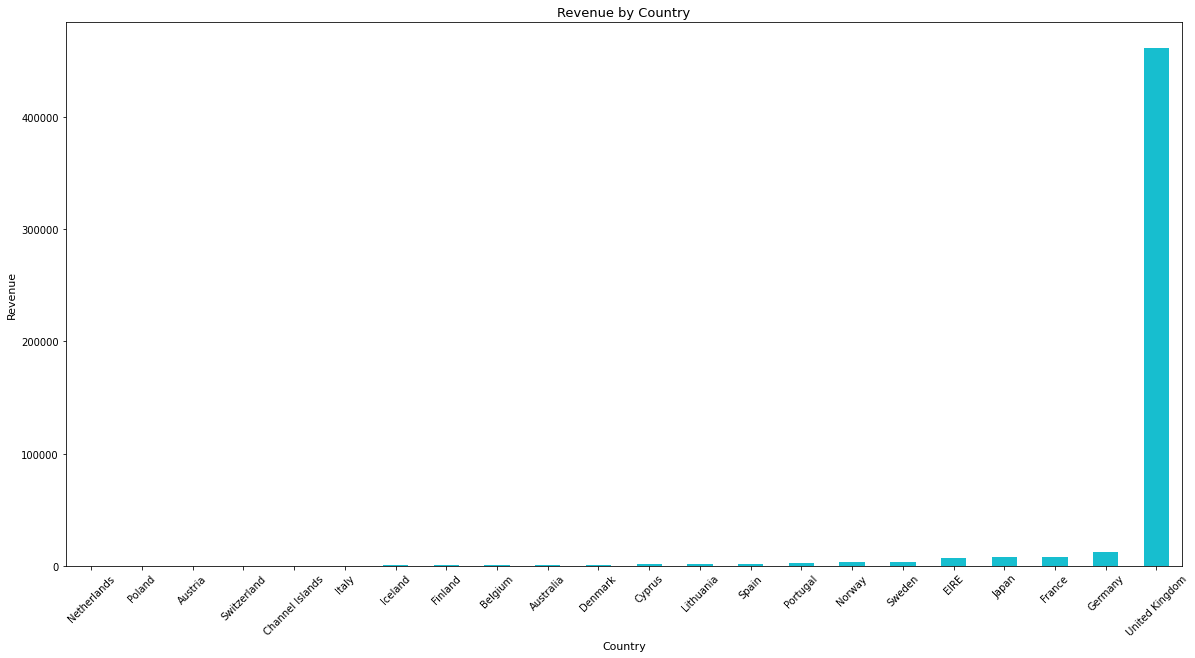

In [25]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [26]:
# 평균
rev_by_countries / total_revenue

Country
Netherlands        0.000371
Poland             0.000478
Austria            0.000534
Switzerland        0.000585
Channel Islands    0.000701
Italy              0.000825
Iceland            0.001372
Finland            0.001721
Belgium            0.001872
Australia          0.001991
Denmark            0.002470
Cyprus             0.003066
Lithuania          0.003202
Spain              0.003554
Portugal           0.004703
Norway             0.007300
Sweden             0.007391
EIRE               0.014168
Japan              0.014852
France             0.015253
Germany            0.024571
United Kingdom     0.889021
Name: CheckoutPrice, dtype: float64

### **월별 매출**

In [27]:
retail['InvoiceDate'].sort_values(ascending=False)

23866   2010-12-17 17:23:00
23851   2010-12-17 17:23:00
23865   2010-12-17 17:23:00
23839   2010-12-17 17:23:00
23840   2010-12-17 17:23:00
                ...        
4       2010-12-01 08:26:00
3       2010-12-01 08:26:00
2       2010-12-01 08:26:00
1       2010-12-01 08:26:00
0       2010-12-01 08:26:00
Name: InvoiceDate, Length: 23867, dtype: datetime64[ns]

In [28]:
def extract_month(date) : # 201109(=2011년 9월)
  month = str(date.month)
  if date.month < 10 :
    month = '0' + month
  return str(date.year) + month

In [29]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012    518805.7
Name: CheckoutPrice, dtype: float64

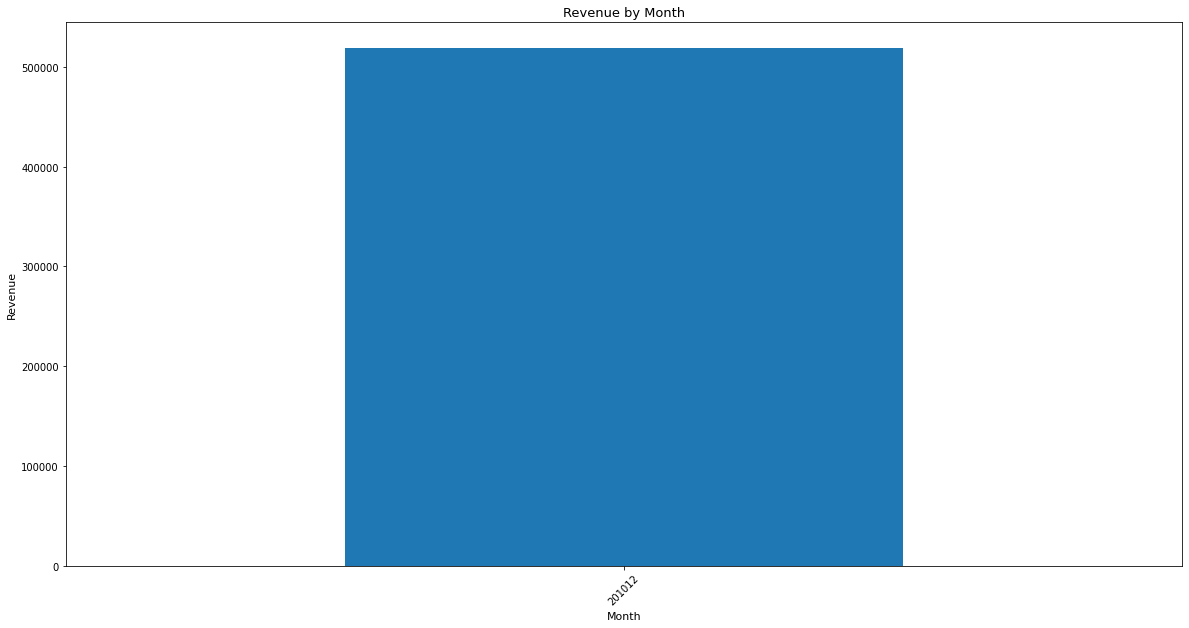

In [30]:
# plot_bar 함수 정의
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45) :
  plot = df.plot(kind='bar', color=color, figsize=figsize)
  plot.set_xlabel(xlabel, fontsize=11)
  plot.set_ylabel(ylabel, fontsize=11)
  plot.set_title(title, fontsize=13)
  plot.set_xticklabels(labels=df.index, rotation=rotation)

# 월평균 시각화
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### **요일별 매출**

In [31]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0     58858.32
1     83117.61
2    115937.03
3    134578.51
4     77236.86
6     49077.37
Name: CheckoutPrice, dtype: float64

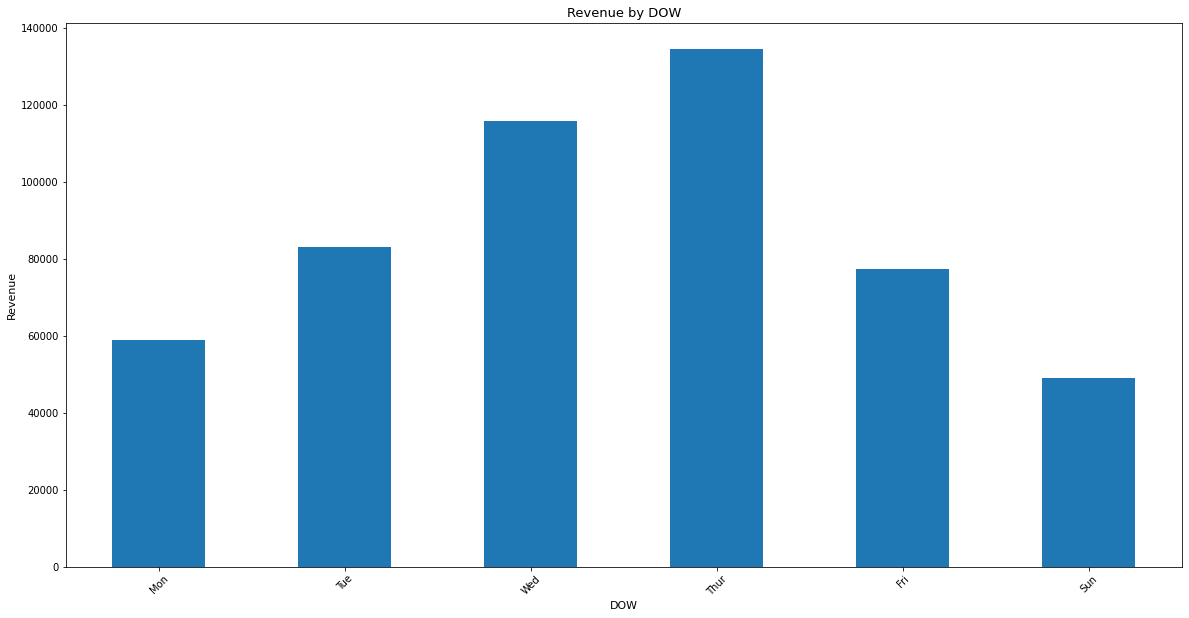

In [32]:
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

### **시간별 매출**

In [33]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

7       467.00
8      6250.08
9     41024.26
10    69792.52
11    59074.20
12    78183.53
13    71997.54
14    44969.29
15    64883.72
16    57161.96
17    16033.50
18     4720.83
19     3946.63
20      300.64
Name: CheckoutPrice, dtype: float64

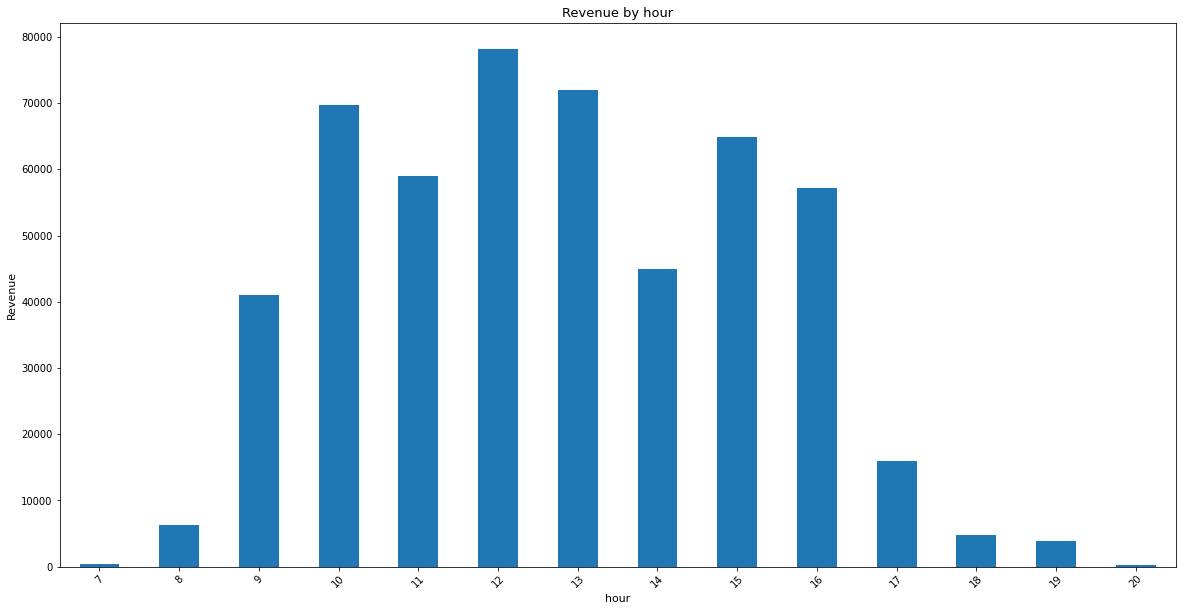

In [34]:
plot_bar(rev_by_hour, 'hour', 'Revenue', 'Revenue by hour')

### **매출 데이터로부터 insight**
* 전체 매출의 82%가 UK에서 발생
* 11년도의 가장 많은 주문이 발생한 달은 11월(12월의 전체 데이터가 반영되지 않음)
* 11월의 판매량이 압도적으로 많음
* 일주일 중 목요일까지는 성장세, 이후로 하락(토요일에는 주문을 받지 않음)
* 7시에 주문 시작, 12시까지 증가세, 15시까지 하락, 15시 이후부터는 급락

### **제품별 metrics**

In [35]:
# Top 10 판매 제품 -> 개수가 제일 많은 제품
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
84077     4944
85123A    3379
22834     2979
22693     2592
22492     2520
22189     2235
21212     2228
84879     2219
21915     2161
22188     2140
Name: Quantity, dtype: int32

In [36]:
# Top 10 매출 제품 -> 금액이 제일 많이 팔린 제품
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
22423     16529.85
85123A     8968.85
21623      6898.69
82484      6569.13
21137      6022.35
79321      5848.79
22189      5461.53
22188      5106.44
22328      4713.95
22086      4464.95
Name: CheckoutPrice, dtype: float64

### **Top 3 아이템의 월별 판매량 추이**

In [37]:
# InvoiceDate의 데이터의 인덱스 별로 set해준다.
# 그 다음 StockCode의 달별로 그룹을 만든다.
# 수량과 가격의 합을 top_selling의 인덱스 번호 기준으로 조회한다.
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index[:3]]
monthly_top3

,,Quantity,CheckoutPrice
StockCode,,,
84077,201012,4944,1093.92
85123A,201012,3379,8968.85
22834,201012,2979,3777.90


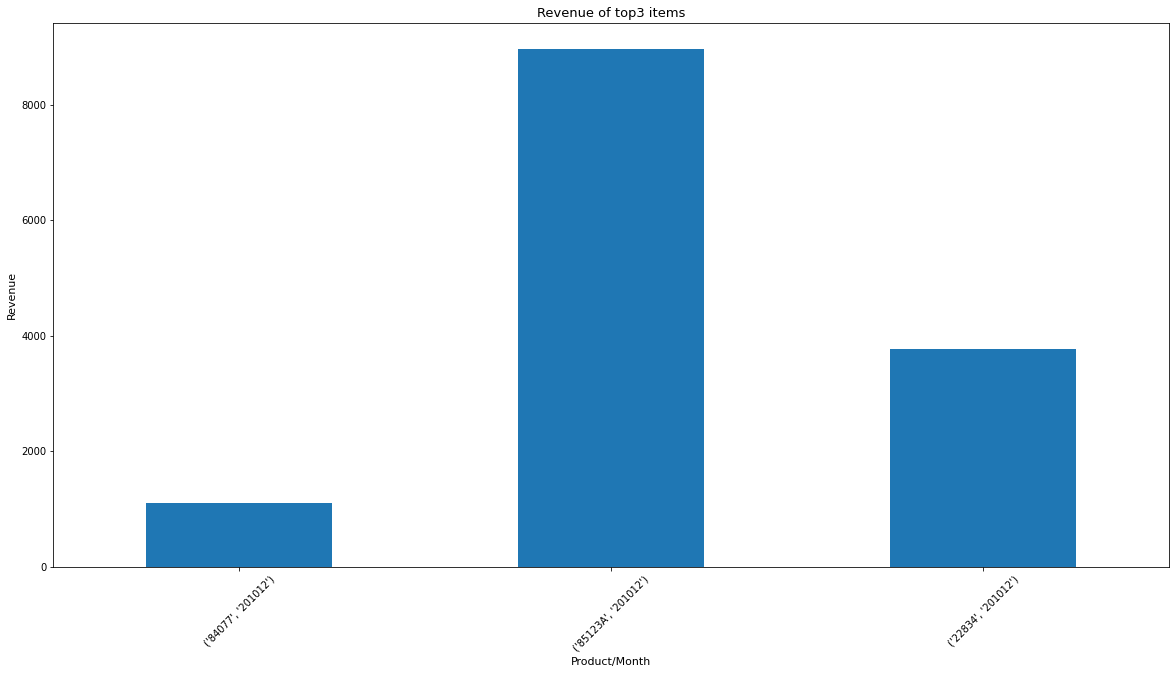

In [38]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top3 items')

### **1-3 우수고객 선별하기**

In [ ]:
'''# 구글 드라이브 연결
from google.colab import drive
drive.mount('./content/drive')
'''

In [39]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerId' : np.int32,
    'Quantity' : np.int32
}
retail = pd.read_csv('./OnlineRetail.csv', dtype=dtypes)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [49]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.340000


In [50]:
# 날짜 데이터 형식으로 바꾸기
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000


### **우수 고객 확인**

In [62]:
# 구매 횟수 기준
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: Quantity, Length: 4372, dtype: int64

In [63]:
# 지불 금액 기준
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646.0    279489.031250
18102.0    256438.484375
17450.0    187482.171875
14911.0    132572.625000
12415.0    123725.453125
               ...      
12503.0     -1126.000000
17603.0     -1165.300049
14213.0     -1192.199951
15369.0     -1592.489990
17448.0     -4287.629883
Name: CheckoutPrice, Length: 4372, dtype: float32

### **사용자 기준으로 최초 구매한 월(month) 연산하기**

In [65]:
# 구매월(일, day는 무시)

# get_month_as_datetime(2010-12-01 08:26:00) -> return 2010-12-01
# get_month_as_datetime(2010-12-03 09:10:00) -> return 2010-12-01
def get_month_as_datetime(date) :
  return datetime(date.year, date.month, 1) # 2010-12-01

# retail[InvoiceDate]
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.299999,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.000000,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000,2010-12-01


In [67]:
month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.200001,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.599999,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.849999,2011-12-01,2011-08-01


### 기준이 되는 월과 실제 구매 월의 차이 계산하기

In [69]:
# 각 구매가 최초 구매로부터 얼마의 월이 지났는지 연산
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.200001,2011-12-01,2011-08-01,4.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.599999,2011-12-01,2011-08-01,4.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000,2011-12-01,2011-08-01,4.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000,2011-12-01,2011-08-01,4.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.849999,2011-12-01,2011-08-01,4.0


### **1-4 푸시 노티피케이션 타입 의사 결정하기**

### 쿠폰 발송을 할 때 push를 언제 보내는게 좋을까?

In [70]:
# 가장 많이 주문이 일어나는 시점에서 하는 것이 직관적인 판단
# 데이터를 파악
# 주문이 가장 많이 일어나는 시점을 찾아야 하므로
# 시간대별로 주문이 얼마나 일어났는지 확인
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']
order_by_hour

6        41
7       383
8      8792
9     22464
10    38951
11    50249
12    73342
13    65062
14    55075
15    46220
16    24997
17    13734
18     3137
19     3511
20      871
Name: CustomerID, dtype: int64

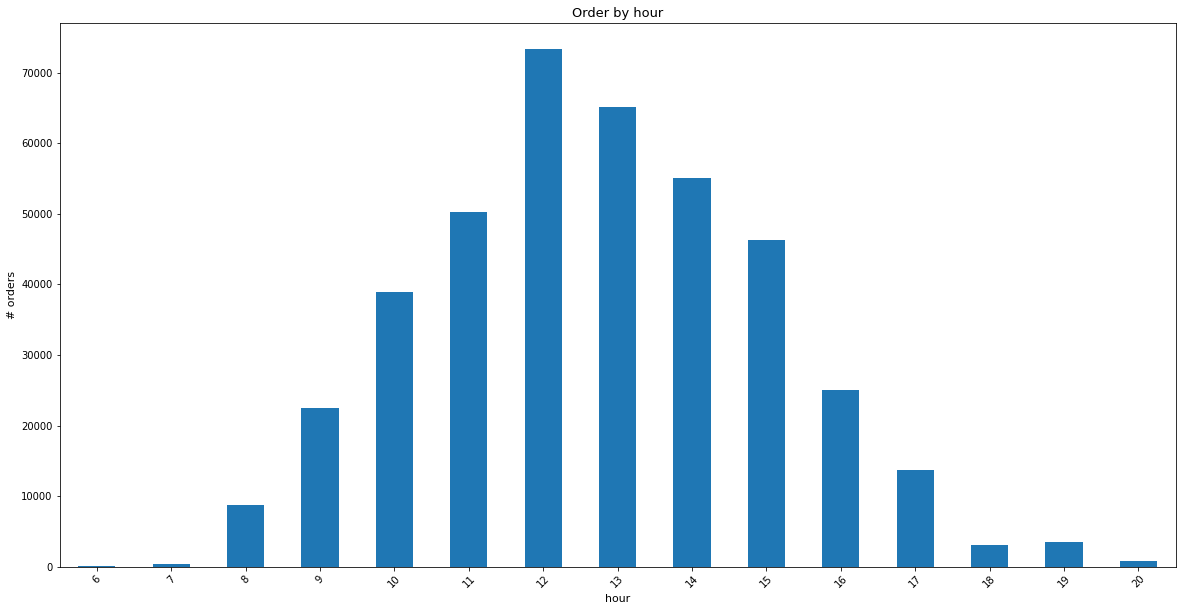

In [71]:
plot_bar(order_by_hour, 'hour', '# orders', 'Order by hour')

In [75]:
# 06:00
# 07:30 379
# 08:00 3145
# ...
def half_an_hour(date) :
  minute = ':00'
  if date.minute > 30 :
    minute = ':30'
  hour = str(date.hour)
  if date.hour < 10 :
    hour = '0' + hour
  
  return hour + minute

In [76]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00       33
06:30        8
07:30      383
08:00     3184
08:30     5608
09:00     9550
09:30    12914
10:00    17384
10:30    21567
11:00    19424
11:30    30825
12:00    37795
12:30    35547
13:00    31682
13:30    33380
14:00    27447
14:30    27628
15:00    24702
15:30    21518
16:00    14874
16:30    10123
17:00     9358
17:30     4376
18:00     1872
18:30     1265
19:00     1600
19:30     1911
20:00      834
20:30       37
Name: CustomerID, dtype: int64

In [78]:
order_by_hour_half / order_by_hour_half.sum()

06:00    0.000081
06:30    0.000020
07:30    0.000941
08:00    0.007826
08:30    0.013785
09:00    0.023474
09:30    0.031743
10:00    0.042730
10:30    0.053012
11:00    0.047745
11:30    0.075769
12:00    0.092901
12:30    0.087376
13:00    0.077875
13:30    0.082049
14:00    0.067466
14:30    0.067911
15:00    0.060718
15:30    0.052892
16:00    0.036561
16:30    0.024883
17:00    0.023002
17:30    0.010756
18:00    0.004601
18:30    0.003109
19:00    0.003933
19:30    0.004697
20:00    0.002050
20:30    0.000091
Name: CustomerID, dtype: float64

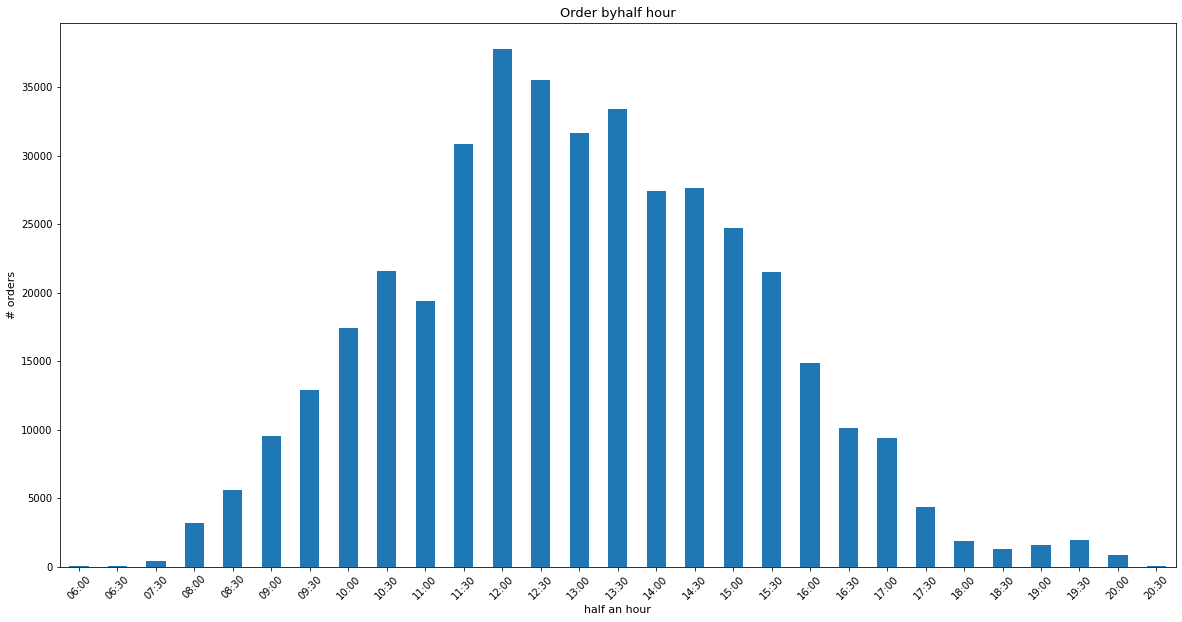

In [80]:
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'Order byhalf hour')